<a href="https://colab.research.google.com/github/vlada08/analytics_tasks/blob/master/magistra_praktiskais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
!ls

en-lv.txt.zip  sample_data


In [ ]:
#os.chdir('/content/Magistra_darbs')

FileNotFoundError: ignored

## Pirmā Daļa: Datu ielāde un analīze

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

os.chdir('drive/MyDrive/Magistra_darbs/data')

In [ ]:
# zip faila ielāde (OpenSubtitles 2018)
!wget -O en-lv.txt.zip http://opus.nlpl.eu/download.php?f=OpenSubtitles/v2018/moses/en-lv.txt.zip

--2023-04-29 16:16:14--  http://opus.nlpl.eu/download.php?f=OpenSubtitles/v2018/moses/en-lv.txt.zip
Resolving opus.nlpl.eu (opus.nlpl.eu)... 193.166.25.9
Connecting to opus.nlpl.eu (opus.nlpl.eu)|193.166.25.9|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://opus.nlpl.eu/download.php?f=OpenSubtitles/v2018/moses/en-lv.txt.zip [following]
--2023-04-29 16:16:16--  https://opus.nlpl.eu/download.php?f=OpenSubtitles/v2018/moses/en-lv.txt.zip
Connecting to opus.nlpl.eu (opus.nlpl.eu)|193.166.25.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/moses/en-lv.txt.zip [following]
--2023-04-29 16:16:17--  https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/moses/en-lv.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiti

In [ ]:
!unzip en-lv.txt.zip

Archive:  en-lv.txt.zip
  inflating: OpenSubtitles.en-lv.en  
  inflating: OpenSubtitles.en-lv.lv  
  inflating: OpenSubtitles.en-lv.ids  
  inflating: README                  


In [ ]:
# Datu apskate angļu valodā
!head -10 OpenSubtitles.en-lv.en

head: cannot open 'OpenSubtitles.en-lv.en' for reading: No such file or directory


In [ ]:
# Datu apskate latviešu valodā
!head -10 OpenSubtitles.en-lv.lv

Pŗdŗją gadsimtą pirms dzima jauną ticļba - kristietļba, kam bija lemts gązt Romas pagąnu tirąniju un radļt jaunu sabiedrļbu, Romas Republika bija visas cilvilizŗtąs pasaules centrą.
Dzejnieks skandŗja, "vistaisnļgąką,
"pirmą starp pilsŗtąm un dievu mąjvieta ir zelta Roma."
Taču, bždama slavas un varas zenļtą, republika cieta no nąvŗjo¹as kaites, verdzļbas.
Pie apvąr¹ńa brieda diktatžras laiks, bija vajadzļgs tikai notikums, kas pavŗrtu tai ce¶u.
Tają pa¹ą gadsimtą iekarotają grieóu provincŗ Trąóiją neizglļtota verdzene vairoja sava kunga bagątļbu, laizdama pasaulŗ dŗlu, kam vińa deva vąrdu Spartaks.
Lepnais, nepak¶ąvļgais dŗls tika pąrdots izdzļvot savu nąvi Lļbijas raktuvŗs, vŗl nesasniedzis trļspadsmit gadu slieksni.
Tur rļkstes, va¾u un saules varą viń¹ vadļja savus pusaud¾a un agrąs jaunļbas gadus, lolojot sapni par verdzļbas galu, kas pienąks pŗc veseliem 2000 gadiem.
Atpaka¶ pie darba!
Celies aug¹ą, Spartak, tu - trąóie¹u suns!


In [ ]:
lv_file = open('./OpenSubtitles.en-lv.lv', 'r')
en_file = open('./OpenSubtitles.en-lv.en', 'r')

In [ ]:
file_lv = lv_file.readlines()
file_eng = en_file.readlines()

In [ ]:
# Latviešu valodas korpusa pārveidošana un sagatavošana turpmākai apstrādei
korpus_lv = []
for l in file_lv:
  korpus_lv.append(l.lower().replace('ŗ','ē').replace('ą','ā').replace('ļ','ī').replace('\n','')\
                    .replace('ž','ū').replace('¹','š').replace('ń','ņ').replace('¶','ļ'))

korpus_lv[8]

'atpakaļ pie darba!'

In [ ]:
# Angļu valodas korpusa apstrāde
korpus_eng = []
for l in file_eng:
  korpus_eng.append(l.lower().replace('\n',''))

korpus_eng[8]

'back to work! back to work!'

In [ ]:
import pandas as pd

In [ ]:
# teksta sagatovašana pirms emocion.nokrasas noteikšanas

df_eng = pd.DataFrame(korpus_eng).rename(columns = {0:'data_eng'})
#len(eng_list)
df_eng = pd.DataFrame(korpus_eng).rename(columns = {0:'data_eng'})

df_eng['lv_tulkojums'] = korpus_lv

df_eng = df_eng.drop_duplicates().reset_index(drop=True)

df_eng.loc[:,'vardi_eng'] =df_eng.data_eng.str.split()

df_eng['vardu_skaits'] = df_eng['vardi_eng'].apply(lambda x: len(x))

In [ ]:
# pārbaudīsim dublikātus angļu valodai 

#izņemsim liekas atstarpes
df_eng['data_eng'] = df_eng['data_eng'].str.strip()
df_eng['lv_tulkojums'] = df_eng['lv_tulkojums'].str.strip()

df_eng['data_eng'] = df_eng['data_eng'].str.replace('-','').str.strip()
df_eng['lv_tulkojums'] = df_eng['lv_tulkojums'].str.replace('-','').str.strip()
df_eng_dupl = df_eng[['data_eng','lv_tulkojums','vardu_skaits']]

print('Sākumā rindiņu skaits: ',len(df_eng_dupl))



Sākumā rindiņu skaits:  453728


In [ ]:
eng_duplics = df_eng_dupl[df_eng_dupl.duplicated('data_eng')]
df_eng_dupl[df_eng_dupl.duplicated('data_eng')]

lv_duplics = df_eng_dupl[df_eng_dupl.duplicated('lv_tulkojums')]
lv_dupl_indeksi = lv_duplics[~lv_duplics.isin(eng_duplics)].dropna(how = 'all').index
lv_dupl_not_eng = df_eng.loc[df_eng.index.isin(lv_dupl_indeksi)]
lv_dupl_not_eng





,data_eng,lv_tulkojums,vardi_eng,vardu_skaits
173,varinia!,varīnija.,[varinia!],1
186,no.,nē.,[no.],1
294,galino.,galino.,[galino.],1
381,yes.,jā.,[yes.],1
512,"oh, excellent, excellent.",lieliski.,"[oh,, excellent,, excellent.]",3
...,...,...,...,...
453621,we should build something together.,varbūt uzceīam kaut ko kopā.,"[we, should, build, something, together.]",5
453623,we need to stick together.,mums jāturas kopā.,"[we, need, to, stick, together.]",5
453681,do you have a knife?,vai tev ir nazis?,"[do, you, have, a, knife?]",5
453698,we're home!,esam mājās!,"[we're, home!]",2


In [ ]:
df_eng.loc[df_eng.lv_tulkojums == 'aiziet, puiši!']

,data_eng,lv_tulkojums,vardi_eng,vardu_skaits
18963,"come on, guys.","aiziet, puiši!","[come, on,, guys.]",3
355653,"let's go! come on, guys, let's go!","aiziet, puiši!","[let's, go!, come, on,, guys,, let's, go!]",7
356335,"let's go, fellas.","aiziet, puiši!","[let's, go,, fellas.]",3
404590,"go, boys! go, boys!","aiziet, puiši!","[go,, boys!, go,, boys!]",4


In [ ]:
from collections import Counter
eng_tokens = lv_dupl_not_eng.groupby('lv_tulkojums').agg({'vardi_eng':'sum'})
eng_tokens


eng_tokens['count_tok'] = eng_tokens['vardi_eng'].apply(lambda x: Counter(x) if x !=[] else[])
eng_tokens['different_words'] = eng_tokens['count_tok'].apply(lambda x: min(zip(x.values(),x.keys()))[1] if min(zip(x.values(),x.keys()))[0]!= max(zip(x.values(),x.keys()))[0] else '-')

eng_tokens['different_words'].value_counts()[:15]
eng_tokens[eng_tokens['different_words'] == 'come']

# sagatavosim datu kopu emocionālas noskaņas novērtējumam
df_eng.describe()
df_eng_filt = df_eng.loc[df_eng.vardu_skaits >3].copy()

# sadalīsim datu kopu train un test




In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_eng_filt, test_size=0.01, random_state=42, shuffle=True)

In [ ]:
test

,data_eng,lv_tulkojums,vardi_eng,vardu_skaits
73109,three of them were possessed themselves and su...,trīs paši kīuva apsēsti un drīzumā nomira.,"[three, of, them, were, possessed, themselves,...",9
86555,they would have taken you to jerusalem.,viņu būtu tevi aizveduši uz jeruzalemi.,"[they, would, have, taken, you, to, jerusalem.]",7
64135,what do you know about it? nothing!,ko tu par to zini?,"[what, do, you, know, about, it?, nothing!]",7
328682,"guys, now, this is the most amazing thing...",tas ir vissatriecošākais...,"[guys,, now,, this, is, the, most, amazing, th...",8
126973,where are we meeting?,kur tiksimies?,"[where, are, we, meeting?]",4
...,...,...,...,...
77248,lt's the fastest broom in the world.,pasaules ātrākā slota!,"[-lt's, the, fastest, broom, in, the, world.]",7
251094,"i didn't go to ""screw all day and drink all ni...",es negāju nekonedarītvisudienu un dzertvisunak...,"[i, didn't, go, to, ""screw, all, day, and, dri...",17
330313,i'm gonna get my own place soon.,drīz dzīvošu viens pats.,"[i'm, gonna, get, my, own, place, soon.]",7
253094,i don't have any!,man tādu nav!,"[i, don't, have, any!]",4


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Emocionālas nokrāsas analīze angļu valodas tekstam
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)



tokenizer = AutoTokenizer.from_pretrained(MODEL)

text = korpus_eng[8]
#text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

OSError: ignored

In [ ]:
text = korpus_eng[800]
text

NameError: ignored

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.4 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

# model_path = 'distilbert-base-uncased-finetuned-sst-2-english'
# sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
# #sentiment_task(text)

In [ ]:
sentiment_classifier_1 = pipeline(
    model="distilbert-base-uncased-finetuned-sst-2-english",
    task="sentiment-analysis",
    top_k=None # return all scores
)

In [ ]:
eng_list = test.data_eng.to_list()

sentim_series_1 = []
perc_series_1 = []

for text in eng_list:
  #print(sentim_series)
  sentim_series_1.append(sentiment_classifier_1(text)[0][0]['label'])
  perc_series_1.append(sentiment_classifier_1(text)[0][0]['score'])

In [ ]:
sentim_series_1[:10]

['NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE']

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Magistra_darbs/data'

In [ ]:
sentiment_classifier_2 = pipeline(model="nlptown/bert-base-multilingual-uncased-sentiment", max_length=512,truncation=True,add_special_tokens = True)
sentim_series_2 = []
perc_series_2 = []

for input in test.data_eng.to_list():
  sentim_series_2.append(sentiment_classifier_2(input)[0]['label'])
  perc_series_2.append(sentiment_classifier_2(input)[0]['score'])



test = test.reset_index()
test['distilbert_res'] = pd.Series(sentim_series_1)
test['distilbert_score'] = pd.Series(perc_series_1)

test['mlbert_res'] =  pd.Series(sentim_series_2)
test['mlbert_score'] = pd.Series(perc_series_2)

test.to_pickle('test.pickle')

In [ ]:
df_eng.head(5)

,data_eng,lv_tulkojums,vardi_eng,vardu_skaits
0,"in the last century, before the birth of the n...",pēdējā gadsimtā pirms dzima jaunā ticība kris...,"[in, the, last, century,, before, the, birth, ...",41
1,"""of all things fairest,"" sang the poet,","dzejnieks skandēja, ""vistaisnīgākā,","[""of, all, things, fairest,"", sang, the, poet,]",7
2,"""first among cities and home of the gods is go...","""pirmā starp pilsētām un dievu mājvieta ir zel...","[""first, among, cities, and, home, of, the, go...",11
3,"yet, even at the zenith of her pride and power...","taču, būdama slavas un varas zenītā, republika...","[yet,, even, at, the, zenith, of, her, pride, ...",21
4,the age of the dictator was at hand waiting in...,"pie apvāršņa brieda diktatūras laiks, bija vaj...","[the, age, of, the, dictator, was, at, hand, w...",19


In [ ]:
test = test.reset_index()
test['distilbert_res'] = pd.Series(sentim_series_1)
test['distilbert_score'] = pd.Series(perc_series_1)

test['mlbert_res'] =  pd.Series(sentim_series_2)
test['mlbert_score'] = pd.Series(perc_series_2)

In [ ]:
test.head(5)

,index,data_eng,lv_tulkojums,vardi_eng,vardu_skaits,distilbert_res,distilbert_score,mlbert_res,mlbert_score
0,73109,three of them were possessed themselves and su...,trīs paši kīuva apsēsti un drīzumā nomira.,"[three, of, them, were, possessed, themselves,...",9,NEGATIVE,0.997885,1 star,0.476309
1,86555,they would have taken you to jerusalem.,viņu būtu tevi aizveduši uz jeruzalemi.,"[they, would, have, taken, you, to, jerusalem.]",7,NEGATIVE,0.973672,1 star,0.355058
2,64135,what do you know about it? nothing!,ko tu par to zini?,"[what, do, you, know, about, it?, nothing!]",7,NEGATIVE,0.999664,1 star,0.603833
3,328682,"guys, now, this is the most amazing thing...",tas ir vissatriecošākais...,"[guys,, now,, this, is, the, most, amazing, th...",8,POSITIVE,0.999876,5 stars,0.940766
4,126973,where are we meeting?,kur tiksimies?,"[where, are, we, meeting?]",4,NEGATIVE,0.976569,5 stars,0.232105


In [ ]:
test.to_pickle('test.pickle')

In [ ]:
import pickle
objectRep = open("test.pickle", "rb")



test = pickle.load(objectRep)

objectRep.close()

In [ ]:
# Rezultātu salīdzinājums
pd.crosstab(test.distilbert_res,test.mlbert_res,normalize = 'index')

mlbert_res,1 star,2 stars,3 stars,4 stars,5 stars
distilbert_res,,,,,
NEGATIVE,0.449067,0.13120,0.212267,0.036267,0.171200
POSITIVE,0.109780,0.02994,0.226880,0.115103,0.518297


In [ ]:
test.loc[(test.distilbert_res == 'NEGATIVE')&(test.mlbert_res=='5 stars')]

,index,data_eng,lv_tulkojums,vardi_eng,vardu_skaits,distilbert_res,distilbert_score,mlbert_res,mlbert_score
4,126973,where are we meeting?,kur tiksimies?,"[where, are, we, meeting?]",4,NEGATIVE,0.976569,5 stars,0.232105
47,278973,what should i bring?,ko atnest?,"[what, should, i, bring?]",4,NEGATIVE,0.992931,5 stars,0.422689
49,274188,what do i do?,kā es rīkojos?,"[what, do, i, do?]",4,NEGATIVE,0.983586,5 stars,0.470559
54,221864,"now, i see why you're always getting into acci...",tāpēc arī iekīūsti avārijās.,"[now,, i, see, why, you're, always, getting, i...",9,NEGATIVE,0.996091,5 stars,0.572681
66,413084,how'd you find us?,kā tu mūs atradi?,"[how'd, you, find, us?]",4,NEGATIVE,0.989766,5 stars,0.282020
...,...,...,...,...,...,...,...,...,...
3333,5893,"tomorrow, we will bury the lord's body in lake...",rīt mēs nolaidīsim mūsu kunga mirstīgās atliek...,"[tomorrow,, we, will, bury, the, lord's, body,...",13,NEGATIVE,0.946114,5 stars,0.523970
3337,21704,"if you ain't here, i'll hunt you and shoot you...","ja tu nebūsi šeit, es tevi atradīšu un nošaušu...","[if, you, ain't, here,, i'll, hunt, you, and, ...",14,NEGATIVE,0.991632,5 stars,0.260805
3353,257909,"oh, my god! (gasping) oh, my god!",vai dieniņ!,"[oh,, my, god!, (gasping), oh,, my, god!]",7,NEGATIVE,0.706515,5 stars,0.650220
3360,398035,find my own place to stay,♪ atrast vajag vēl vietu savu,"[find, my, own, place, to, stay]",6,NEGATIVE,0.917353,5 stars,0.261766


In [ ]:
#  aprēķināt score vērtības mediānu

test[['distilbert_res','mlbert_res','mlbert_score']].groupby(['distilbert_res','mlbert_res']).median().unstack()


mlbert_score                                        
mlbert_res           1 star   2 stars   3 stars   4 stars   5 stars
distilbert_res                                                     
NEGATIVE           0.411135  0.364033  0.354421  0.340246  0.373012
POSITIVE           0.344259  0.349140  0.356076  0.377948  0.494847

In [ ]:
test.distilbert_res.value_counts()

NameError: ignored

<Axes: >

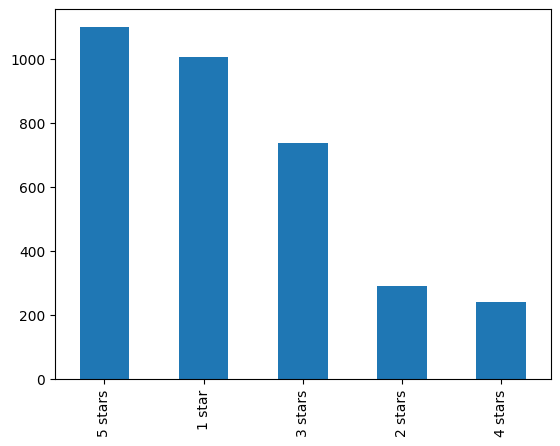

In [ ]:
test.mlbert_res.value_counts().plot(kind='bar')

In [ ]:
test.columns

Index(['index', 'data_eng', 'lv_tulkojums', 'vardi_eng', 'vardu_skaits',
       'distilbert_res', 'distilbert_score', 'mlbert_res', 'mlbert_score'],
      dtype='object')

In [ ]:
!pip install transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import time
import datetime
import gc
import random
#from nltk.corpus import stopwords
import re

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import transformers
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['sentim_enc']= label_encoder.fit_transform(test['distilbert_res'])

In [ ]:
len(test)

3378

In [ ]:
# LV teksta klasifikācija izmantojot BERT

df_lvteksts = test[['lv_tulkojums','distilbert_res', 'distilbert_score', 'mlbert_res', 'mlbert_score','sentim_enc']][:2700]
df_lvteksts.head(5)   

,lv_tulkojums,distilbert_res,distilbert_score,mlbert_res,mlbert_score,sentim_enc
0,trīs paši kīuva apsēsti un drīzumā nomira.,NEGATIVE,0.997885,1 star,0.476309,0
1,viņu būtu tevi aizveduši uz jeruzalemi.,NEGATIVE,0.973672,1 star,0.355058,0
2,ko tu par to zini?,NEGATIVE,0.999664,1 star,0.603833,0
3,tas ir vissatriecošākais...,POSITIVE,0.999876,5 stars,0.940766,1
4,kur tiksimies?,NEGATIVE,0.976569,5 stars,0.232105,0


In [ ]:
df_lvvalid = test[['lv_tulkojums','distilbert_res', 'distilbert_score', 'mlbert_res', 'mlbert_score','sentim_enc']][2700:]


In [ ]:
teksts = df_lvteksts.lv_tulkojums.values
labels = df_lvteksts.sentim_enc.values

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
print(' Original: ', teksts[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(teksts[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(teksts[0])))

 Original:  trīs paši kīuva apsēsti un drīzumā nomira.
Tokenized:  ['tri', '##s', 'pas', '##i', 'ki', '##u', '##va', 'ap', '##ses', '##ti', 'un', 'dr', '##iz', '##uma', 'no', '##mir', '##a', '.']
Token IDs:  [13012, 2015, 14674, 2072, 11382, 2226, 3567, 9706, 8583, 3775, 4895, 2852, 10993, 12248, 2053, 14503, 2050, 1012]


In [ ]:
max_len = 0

# For every sentence...
for sent in teksts:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  139


In [ ]:
input_ids = []
attention_masks = []

# For every tweet...
for tekst in teksts:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        tekst,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', teksts[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  trīs paši kīuva apsēsti un drīzumā nomira.
Token IDs: tensor([  101, 13012,  2015, 14674,  2072, 11382,  2226,  3567,  9706,  8583,
         3775,  4895,  2852, 10993, 12248,  2053, 14503,  2050,  1012,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,

In [ ]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
#val_size = int(0.2 * len(dataset))
val_size = len(dataset)  - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

2,160 training samples
  540 validation samples


In [ ]:
# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
    from_tf=True
)

# if device == "cuda:0":
# # Tell pytorch to run this model on the GPU.
#     model = model.cuda()
model = model.to(device)

All TF 2.0 model weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
 #Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    # Measure how long the training epoch takes.
    t0 = time.time()
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the device using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        optimizer.zero_grad()
        output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)        
        loss = output.loss
        total_train_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.
    print("")
    print("Running Validation...")
    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    # Tracking variables 
    total_eval_accuracy = 0
    best_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        
            output= model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        loss = output.loss
        total_eval_loss += loss.item()
        # Move logits and labels to CPU if we are using GPU
        logits = output.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    if avg_val_accuracy > best_eval_accuracy:
        torch.save(model, 'bert_model')
        best_eval_accuracy = avg_val_accuracy
    #print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    #print("  Validation took: {:}".format(validation_time))
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...


In [44]:
model = torch.load('bert_model')

RuntimeError: ignored

In [ ]:
df_test = pd.read_csv('../input/nlp-getting-started/test.csv')
df_test['text'] = df_test['text'].apply(lambda x:clean_text(x))
test_tweets = df_test['text'].values

In [ ]:
test_input_ids = []
test_attention_masks = []
for tweet in test_tweets:
    encoded_dict = tokenizer.encode_plus(
                        tweet,                     
                        add_special_tokens = True, 
                        max_length = max_len,           
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )
    test_input_ids.append(encoded_dict['input_ids'])
    test_attention_masks.append(encoded_dict['attention_mask'])
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)

In [ ]:
test_dataset = TensorDataset(test_input_ids, test_attention_masks)
test_dataloader = DataLoader(
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
predictions = []
for batch in test_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        with torch.no_grad():        
            output= model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask)
            logits = output.logits
            logits = logits.detach().cpu().numpy()
            pred_flat = np.argmax(logits, axis=1).flatten()
            
            predictions.extend(list(pred_flat))

In [ ]:
# sadalīt rezultātu grupās
# def res_for_lv(l1,s1,l2,s2):
#   if 

In [ ]:
# test_dict = {'text_eng':test.data_eng.reset_index(drop=True), 'text_lv':test.lv_tulkojums.reset_index(drop=True),'index':test.index}
# test_dict_= pd.Series(test.data_eng.values,
#                     index = test.data_eng.index)
# test_dict.reset_inde

test_dict = []
for index, row in test[['data_eng','lv_tulkojums','vardu_skaits']].iterrows():
    test_dict.append({
            'id': index,
            'data_eng': row['data_eng'],
            'lv_tulkojums': row['lv_tulkojums'],
            'vardu_skaits': row['vardu_skaits'],
            })

test_dict[0]

{'id': 73109,
 'data_eng': 'three of them were possessed themselves and subsequently died.',
 'lv_tulkojums': 'trīs paši kīuva apsēsti un drīzumā nomira.',
 'vardu_skaits': 9}

In [ ]:
sentiment_classifier = pipeline(
    model="distilbert-base-uncased-finetuned-sst-2-english",
    task="sentiment-analysis",
    top_k=None
)

test_dict[3]["data_eng"], sentiment_classifier(test_dict[3]["data_eng"])[0]['label']

TypeError: ignored

In [ ]:
type(test_dict)

list

In [ ]:
test_dict[0]['sentiment_predictions'] = sentiment_classifier(test_dict[0]["data_eng"], truncation=True)

In [ ]:
for i in range(len(test_dict)):
  test_dict[i]['sentiment_predictions'] = sentiment_classifier(test_dict[i]["data_eng"], truncation=True)



In [ ]:
eng_list = test.data_eng.to_list()



sentim_series = []
perc_series = []

for text in eng_list:
  #print(sentim_series)
  sentim_series.append(sentiment_task(text)[0]['label'])
  perc_series.append(sentiment_task(text)[0]['score'])

In [ ]:
pd.Series(sentim_series).value_counts()

NEGATIVE    938
POSITIVE    751
dtype: int64

In [ ]:
test_dict[1]

{'id': 86555,
 'data_eng': 'they would have taken you to jerusalem.',
 'lv_tulkojums': 'viņu būtu tevi aizveduši uz jeruzalemi.',
 'vardu_skaits': 7,
 'sentiment_predictions': [[{'label': 'NEGATIVE', 'score': 0.973671555519104},
   {'label': 'POSITIVE', 'score': 0.026328429579734802}]]}

In [ ]:
test_dict_df = pd.DataFrame.from_records(test_dict)

In [ ]:
test_dict_df['sentiment'] = sentim_series

In [ ]:
test_dict_df

,id,data_eng,lv_tulkojums,vardu_skaits,sentiment_predictions,sentiment
0,73109,three of them were possessed themselves and su...,trīs paši kīuva apsēsti un drīzumā nomira.,9,"[[{'label': 'NEGATIVE', 'score': 0.99788528680...",NEGATIVE
1,86555,they would have taken you to jerusalem.,viņu būtu tevi aizveduši uz jeruzalemi.,7,"[[{'label': 'NEGATIVE', 'score': 0.97367155551...",NEGATIVE
2,64135,what do you know about it? nothing!,ko tu par to zini?,7,"[[{'label': 'NEGATIVE', 'score': 0.99966406822...",NEGATIVE
3,328682,"guys, now, this is the most amazing thing...",tas ir vissatriecošākais...,8,"[[{'label': 'POSITIVE', 'score': 0.99987614154...",POSITIVE
4,126973,where are we meeting?,kur tiksimies?,4,"[[{'label': 'NEGATIVE', 'score': 0.97656893730...",NEGATIVE
...,...,...,...,...,...,...
1684,306830,he had every right.,viņam bija visas tiesības.,4,"[[{'label': 'POSITIVE', 'score': 0.99951267242...",POSITIVE
1685,240133,"all right, i'll distract.","labi, es novērsīšu uzmanību.",4,"[[{'label': 'POSITIVE', 'score': 0.99794918298...",POSITIVE
1686,65681,you probably didn't even know what i'm talkin'...,"laikam nemaz nesapratāt, ko teicu.",9,"[[{'label': 'NEGATIVE', 'score': 0.99972563982...",NEGATIVE
1687,363677,least i know you're the right color now.,tagad zinu esi īstajā krāsā.,8,"[[{'label': 'POSITIVE', 'score': 0.99982291460...",POSITIVE


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# naive bayes classifier

import numpy as np 
import pandas as pd 

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud
import matplotlib.pyplot as plt

                
teksti = []
stopwords_set = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Splitting the dataset into train and test set
train_lv, test_lv = train_test_split(test_dict_df,test_size = 0.2)

In [ ]:
train_lv

,id,data_eng,lv_tulkojums,vardu_skaits,sentiment_predictions,sentiment
984,243736,"besides, don't you wanna see what your boy is ...","turklāt tu negribi redzēt, no kā tavs puika ir...",14,"[[{'label': 'POSITIVE', 'score': 0.99085593223...",POSITIVE
1016,134239,i played santa one year.,es biju ziemassvētku vecītis.,5,"[[{'label': 'NEGATIVE', 'score': 0.61549514532...",NEGATIVE
1145,190609,that's from tucker's shirt.,takera krekls.,4,"[[{'label': 'POSITIVE', 'score': 0.67156153917...",POSITIVE
1621,408847,"anyway, as far as i'm concerned, they get marr...","un, pēc manām domām, senajā ēģiptē precējās pā...",14,"[[{'label': 'NEGATIVE', 'score': 0.99382591247...",NEGATIVE
1132,139643,i loved her very much.,.es viņu īoti mīlēju./.,5,"[[{'label': 'POSITIVE', 'score': 0.99986445903...",POSITIVE
...,...,...,...,...,...,...
1200,63900,i am on nobody's side because nobody is on my ...,hobiti? neesmu nekad dzirdējis par hobitiem.,13,"[[{'label': 'NEGATIVE', 'score': 0.99604707956...",NEGATIVE
891,170511,"what's gotten into you, coraline?","kas tev uznācis, koralaina?",5,"[[{'label': 'NEGATIVE', 'score': 0.89722311496...",NEGATIVE
1086,323135,"so, you know, now that you're back",eju! ja reiz esi atgriezusies...,7,"[[{'label': 'POSITIVE', 'score': 0.99440598487...",POSITIVE
1178,295308,he is a talented attorney.,viņš ir talantīgs advokāts.,5,"[[{'label': 'POSITIVE', 'score': 0.99975007772...",POSITIVE


In [ ]:
!npm install stopwords-lv

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ stopwords-lv@0.1.0
added 1 package from 1 contributor and audited 1 package in 1.139s
found 0 vulnerabilities



In [ ]:
!pip install stopwordsiso

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
import stopwordsiso as stopwords
stopwords.has_lang("lv")

True

In [ ]:
stop_lv = stopwords.stopwords("lv") 

stop_lv = list(stop_lv)
add_lv = ['tu','viņš','es','mēs','kas','man','tas','ko','to','kurs','viņa','viņu','tev','nav','un','uz','jūs','mani','tur','mums','kad']
stop_lv.extend(add_lv)

Positive words


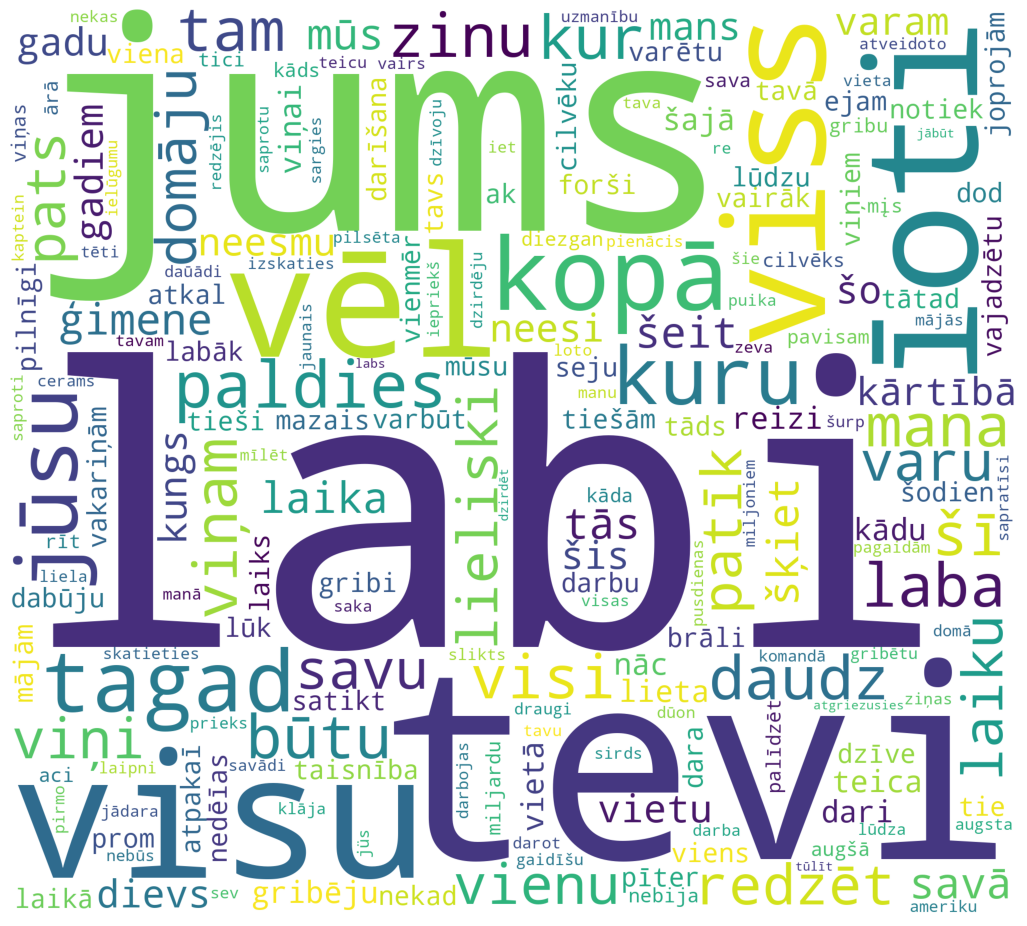

Negative words


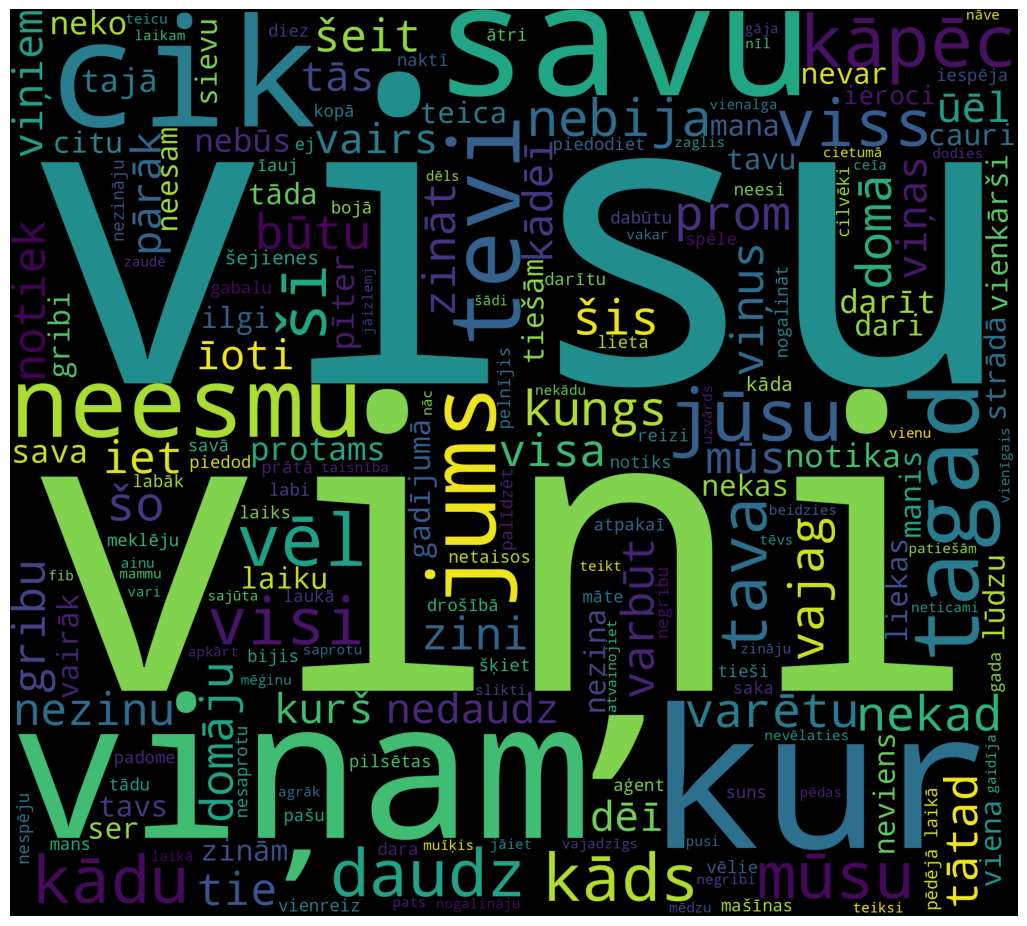

In [ ]:
train_pos = train_lv[train_lv['sentiment'] == 'POSITIVE']
train_pos = train_pos['lv_tulkojums']
train_neg = train_lv[train_lv['sentiment'] == 'NEGATIVE']
train_neg = train_neg['lv_tulkojums']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(
        stopwords = set(stop_lv),
                      background_color=color,
                      width=2000,
                      height=1800
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [ ]:
.# if more neutral -> positive?

In [ ]:
for index, row in train_lv.iterrows():
    words_filtered = [e.lower() for e in row.lv_tulkojums.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stop_lv]
    teksti.append((words_without_stopwords, row.sentiment))

In [ ]:
teksti[0]

(['turklāt', 'negribi', 'redzēt,', 'tavs', 'puika', 'taisīts?'], 'POSITIVE')

In [ ]:
# Extracting word features
def get_words_in_tekst(teksti):
    all = []
    for (words, sentiment) in teksti:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tekst(teksti))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


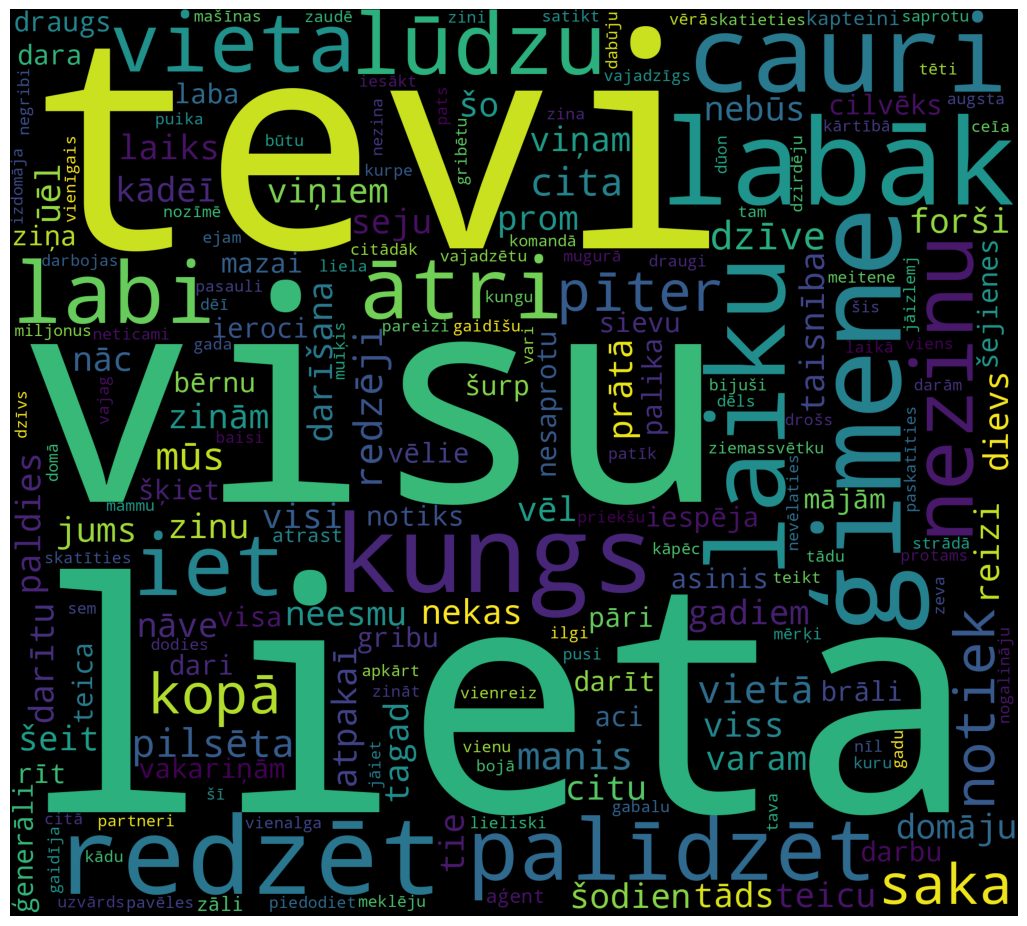

In [ ]:
wordcloud_draw(w_features)

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,teksti)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
test_lv.columns

Index(['id', 'data_eng', 'lv_tulkojums', 'vardu_skaits',
       'sentiment_predictions', 'sentiment'],
      dtype='object')

In [ ]:
test_pos = test_lv[ test_lv['sentiment'] == 'POSITIVE']
test_pos = test_pos['lv_tulkojums']
test_neg = test_lv[ test_lv['sentiment'] == 'NEGATIVE']
test_neg = test_neg['lv_tulkojums']

In [ ]:
sent_res = []
for obj in test_lv['lv_tulkojums']:
  res =  classifier.classify(extract_features(obj.split()))
  sent_res.append(res)

test_lv = test_lv.reset_index()
test_lv['result'] = pd.Series(sent_res)

In [ ]:
test_lv.head(5)

,level_0,index,id,data_eng,lv_tulkojums,vardu_skaits,sentiment_predictions,sentiment,result
0,0,793,42419,"i said it. i'm takin' it back, so stay away fr...","tu dzirdēji – es tikko pateicu, ka es ņemu vis...",13,"[[{'label': 'NEGATIVE', 'score': 0.99423074722...",NEGATIVE,NEGATIVE
1,1,1369,145119,where are you going?,kur tu iesi?,4,"[[{'label': 'NEGATIVE', 'score': 0.97211480140...",NEGATIVE,NEGATIVE
2,2,874,184244,"so, we're working for the agency.",tā ka mēs darbojamies pārvaldes labā.,6,"[[{'label': 'NEGATIVE', 'score': 0.71302527189...",NEGATIVE,NEGATIVE
3,3,1157,429903,we don't need anyone else.,vairs neviens nav vajadzīgs.,5,"[[{'label': 'POSITIVE', 'score': 0.92815291881...",POSITIVE,NEGATIVE
4,4,1521,50093,a spa for people without enough stress in thei...,cilvēkus ar stresa trūkumiem.,10,"[[{'label': 'POSITIVE', 'score': 0.93336814641...",POSITIVE,NEGATIVE


In [ ]:
test_lv.loc[(test_lv.sentiment == 'POSITIVE')&(test_lv.result == 'NEGATIVE')]

,level_0,index,id,data_eng,lv_tulkojums,vardu_skaits,sentiment_predictions,sentiment,result
3,3,1157,429903,we don't need anyone else.,vairs neviens nav vajadzīgs.,5,"[[{'label': 'POSITIVE', 'score': 0.92815291881...",POSITIVE,NEGATIVE
4,4,1521,50093,a spa for people without enough stress in thei...,cilvēkus ar stresa trūkumiem.,10,"[[{'label': 'POSITIVE', 'score': 0.93336814641...",POSITIVE,NEGATIVE
7,7,651,122807,this one does as well.,arī šis stāsts sākas tāpat.,5,"[[{'label': 'POSITIVE', 'score': 0.99983203411...",POSITIVE,NEGATIVE
8,8,734,416570,the camera loves him almost as much as you do.,fotogrāfijās viņš ir dievīgs.,10,"[[{'label': 'POSITIVE', 'score': 0.96894574165...",POSITIVE,NEGATIVE
10,10,904,365861,it's not my fault.,es neesmu vainīgs.,4,"[[{'label': 'POSITIVE', 'score': 0.99126785993...",POSITIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...
313,313,1639,443990,will you look at that?,paskat tik!,5,"[[{'label': 'POSITIVE', 'score': 0.99880242347...",POSITIVE,NEGATIVE
317,317,737,40082,do you trust me?,tu man uzticies?,5,"[[{'label': 'POSITIVE', 'score': 0.97487521171...",POSITIVE,NEGATIVE
321,321,1383,54464,and last but certainly not least.,"un pēdējā, bet ne sliktākā.",6,"[[{'label': 'POSITIVE', 'score': 0.97221779823...",POSITIVE,NEGATIVE
328,328,727,252174,i did. so cool out!,tāpēc nomierinies.,5,"[[{'label': 'POSITIVE', 'score': 0.99967157840...",POSITIVE,NEGATIVE


In [ ]:

neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'NEGATIVE'): 
        neg_cnt = neg_cnt + 1

    test_lv['result'] = 
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'POSITIVE'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 185/156 
[Positive]: 153/45 


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 19.4 MB/s eta 0:00:00


In [ ]:
import datasets
test_ds = datasets.Dataset.from_pandas(pd.DataFrame(data=test_dict))

In [ ]:
test_ds[0]

{'id': 73109,
 'data_eng': 'three of them were possessed themselves and subsequently died.',
 'lv_tulkojums': 'trīs paši kīuva apsēsti un drīzumā nomira.',
 'vardu_skaits': 9,
 'sentiment_predictions': [[{'label': 'NEGATIVE', 'score': 0.9978852868080139},
   {'label': 'POSITIVE', 'score': 0.0021147190127521753}]]}

In [ ]:
!pip install argilla

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 13.3.4
    Uninstalling rich-13.3.4:
      Successfully uninstalled rich-13.3.4


In [ ]:
import argilla as rg

In [ ]:
records = []
for example in test_ds.shuffle():
    record = rg.TextClassificationRecord(
        text=example["data_eng"],
        # metadata={
        #     "category": example["id"]
        # },  # log the intents for exploration of specific intents
        
        prediction=[(pred["label"], pred["score"]) for pred in example["sentiment_predictions"][0] ],
        prediction_agent="distilbert-base-uncased-finetuned-sst-2-english",
    )
    records.append(record)
    
#rg.log(name="labeling_with_pretrained", records=records)

In [ ]:
2+3

In [ ]:
eng_list = df_eng_filt.data_eng.to_list()

In [ ]:
from random import sample
eng_list_sample = sample(eng_list,1000)

In [ ]:
len(eng_list_sample)

10000

In [ ]:
eng_list = df_eng_filt.data_eng.to_list()



sentim_series = []
perc_series = []

for text in eng_list_sample:
  #print(sentim_series)
  sentim_series.append(sentiment_task(text)[0]['label'])
  perc_series.append(sentiment_task(text)[0]['score'])


In [ ]:
# save pickle file!

In [ ]:
sentim_series = pd.Series(sentim_series)
perc_series = pd.Series(perc_series)

In [ ]:
sentim_series.value_counts()

NEGATIVE    564
POSITIVE    436
dtype: int64

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.9 MB/s eta 0:00:00


In [ ]:
# run one more algorithm for sentiments identification
# Import sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:


# Analyze the text with polarityScores
analyzer.polarity_scores(eng_list_sample[0])

{'neg': 0.347, 'neu': 0.653, 'pos': 0.0, 'compound': -0.1513}

In [ ]:
score = analyzer.polarity_scores(eng_list_sample[0])

In [ ]:
max(score, key=score.get)

'neu'

In [ ]:
# Initialize model
analyzer = SentimentIntensityAnalyzer()
def classify_positive(text, threshold=0):
    # Score text
    score = analyzer.polarity_scores(text)
    # Get compound score from dictionary
    score_comp = score.get('compound')

    return score_comp,max(score, key=score.get)

In [ ]:

classify_positive(eng_list_sample[0])

-0.1513

In [ ]:
sentim_series_vader = []
perc_series_vader = []

for text in eng_list_sample:
  #print(sentim_series)
  sentim_series_vader.append(classify_positive(text)[1])
  perc_series_vader.append(classify_positive(text)[0])

In [ ]:
sentim_series_vader = pd.Series(sentim_series_vader)
perc_series_vader = pd.Series(perc_series_vader)

In [ ]:
sentim_series_vader.value_counts()

neu         924
compound     43
neg          20
pos          13
dtype: int64

In [ ]:
sentim_series_vader[sentim_series_vader=='neg']

53     neg
99     neg
130    neg
188    neg
234    neg
241    neg
283    neg
318    neg
331    neg
390    neg
404    neg
434    neg
523    neg
537    neg
613    neg
636    neg
756    neg
880    neg
967    neg
970    neg
dtype: object

In [ ]:
len(eng_list_sample)

1000

In [ ]:
# train lv data fro sentiment identification

## identify lv sample
df_eng_filt['in_sample'] = df_eng_filt.data_eng.apply(lambda x: 1 if x in eng_list_sample else 0)

In [ ]:
lv_list_sample = df_eng_filt.loc[df_eng_filt.in_sample == 1]['lv_tulkojums'].unique()

In [ ]:
len(lv_list_sample)

1367

In [ ]:
# vienam un tam pašam eng tekstam vairāki lv tulkojumi
df_eng_filt.groupby(['data_eng','lv_tulkojums']).count()

,,vardi_eng,vardu_skaits,in_sample
data_eng,lv_tulkojums,,,
! - bubby good boy.,- babijs labs zēns.,1,1,1
! - choose between one life or the other.,- izvēlies vienu dzīvību vai otru.,1,1,1
"! - dooley, put the gun down.","- dūlij, nolaid ieroci.",1,1,1
"! - guys, just go!",- brauciet taču!,1,1,1
"! - leave me alone, drink your maze","- liec mani mierā, dzer savu maiz",1,1,1
...,...,...,...,...
♫my name is maria♪,mani sauc marija,1,1,1
♫that ploughs the raging sea♪,kas putaino jūru vago,1,1,1
♫there is nothing can console me♪,tikai brašā jūrnieka,2,2,2


In [ ]:
df_eng.drop_duplicates()

TypeError: ignored

In [ ]:
df_eng_filt.sort_values

In [ ]:
# pārbaudīt duplikātus
df_eng.loc[df_eng.in_sample == 1]['lv_tulkojums'].unique()

In [ ]:
lv_list_sample

array(['sastājaties līnijā man priekšā.', '-vai atdot.',
       'nebija ne jausmas, ka esi kļuvis reli"iozs.', ...,
       'tinieties. nē.', '- visi kopā!',
       'tiešām gribi, lai tas, kurš tevi radīja, nokīūst nelaimē?'],
      dtype=object)

In [ ]:
eng_list_sample

["i'm really sorry, annabel.",
 'i need you to roll over here and chew off these hand-ties.',
 'yeah, well, the ritz was sold out.',
 'so what happened next?',
 "i'd say it's, uh, woodsy, with a medium body and a hint of --",
 "we're not even supposed to do that.",
 "he isn't home from the gym yet.",
 'the car will still be there.',
 'i always said it would go up in smoke.',
 'would you like to settle in? we have your room ready.',
 '- i never cared who you were.',
 'till you wise up',
 "but i'd also believe you could be bought, for the right price.",
 '--and everybody started running and screaming.',
 'she now welcomed a very real one.',
 "and we work with him till he's pretty much got it down.",
 "and when you say fowler's got kate...",
 'so you decided to come as a black muppet?',
 "well, if you're gonna twist my arm, i don't want any trouble.",
 "what is that? that's a...",
 'how are we supposed to survive on $42 a month? we?',
 'or give you away.',
 "i didn't tell you to knock ove

In [ ]:
sentim_series

0      NEGATIVE
1      NEGATIVE
2      POSITIVE
3      NEGATIVE
4      POSITIVE
         ...   
995    NEGATIVE
996    POSITIVE
997    NEGATIVE
998    NEGATIVE
999    NEGATIVE
Length: 1000, dtype: object

In [ ]:
train
test